In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()

Saving task5_405649.csv to task5_405649 (1).csv


In [2]:
df = pd.read_csv(list(uploaded)[0])
df.index += 1
df

,y
1,28
2,14
3,8
4,31
5,41
...,...
96,217
97,211
98,238
99,226


In [3]:
#******* PUT DATA HERE ********
alpha = 0.2
task1 = 43
task2 = 100
task5 = 101

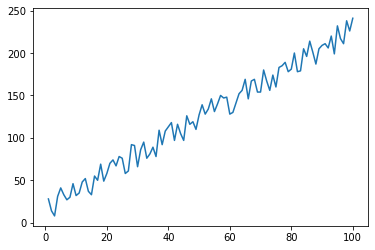

In [4]:
plt.plot(df.index, df['y'])

In [5]:
def smooth_data(alpha):
  df['Ys'] = df['y']/3
  for x in df.index:
    if x == 1:
      df['Ys'][x] = df['y'][x]
    else:
      df['Ys'][x] = alpha * df['y'][x] + (1 - alpha) * df['Ys'][x - 1]
smooth_data(alpha)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,y,Ys
1,28,28.000000
2,14,25.200000
3,8,21.760000
4,31,23.608000
5,41,27.086400
...,...,...
96,217,211.125459
97,211,211.100367
98,238,216.480294
99,226,218.384235


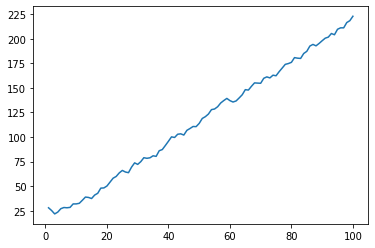

In [6]:
plt.plot(df.index, df['Ys'])

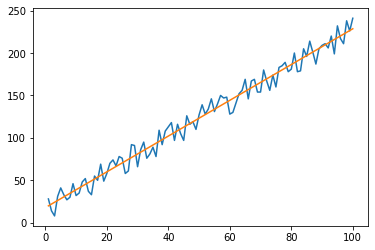

In [7]:
plt.plot(df.index, df['y'])
z = np.polyfit(df.index, df['y'], 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index))

In [8]:
sumxy = 0
sumx = 0
sumy = 0
sumxx = 0
sumyf2 = 0
sumyy2 = 0

n = len(df)

for x in df.index:
  sumxy += df['y'][x] * x
  sumx += x
  sumy += df['y'][x]
  sumxx += x * x

a = (n * sumxy - sumx*sumy)/(n*sumxx - (sumx * sumx))
b = (sumy - a*sumx)/n
a = round(a, 2)
b = round(b, 1)


for x in df.index:
  sumyf2 += (df['y'][x] - (a * x + b)) * (df['y'][x] - (a * x + b))
  sumyy2 += (df['y'][x] - (sumy/n)) * (df['y'][x] - (sumy/n))

rr = 1 - (sumyf2 / sumyy2)

In [9]:
print(round(df['Ys'][task1], 2))
print(round(df['Ys'][task2], 2))
print(round(a, 2))
print(round(rr, 2))
print(round(task5 * a + b, 2))

102.83
222.91
2.11
0.97
230.91
